### We check truly under which conditions the integral proposed by Alex is 0, for forward solved shapes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
import scipy.integrate as sint

"""Function get_integral_shape is now in helper functions"""

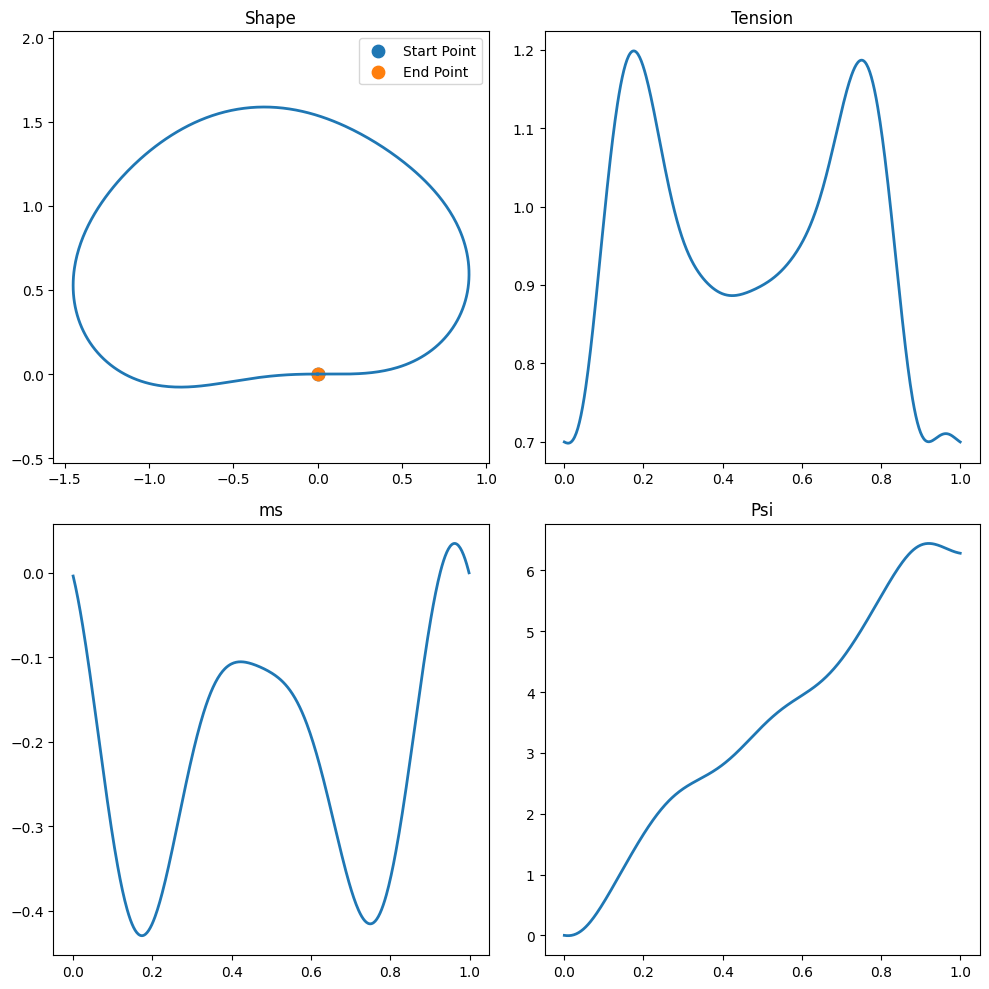

Length: 6.42660504376456
integrals: (np.float64(0.06637766874218265), np.float64(0.007086354886066015), np.float64(-1.387494652433314))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
import scipy.integrate as sint
# setting tns by hand
mag = 1
rel_asymm_mag = 0.3

NrModes = 1  # How many Fourier modes should be included
Nmax = 5  # Maximal mode number to draw from (Nmax >= NrModes)
N = np.random.choice(range(2, 3), NrModes, replace=False)  # Set of modes
Magnc = mag * (np.random.rand(NrModes) - 0.5)  # Magnitudes of cosine modes
Magns = mag * (np.random.rand(NrModes) - 0.5)  # Magnitudes of sine modes

tns_symm = lambda x: (np.real(np.exp(1j * 2 * np.pi * x[:, None] * N) @ Magnc) +
                np.imag(np.exp(1j * 2 * np.pi * x[:, None] * N) @ Magns))

tns_asymm = lambda x: rel_asymm_mag * (np.real(np.exp(1j * 2 * np.pi * x[:, None] * N* 1.5 + 2 * np.pi / 7) @ Magnc) +
                np.imag(np.exp(1j * 2 * np.pi * x[:, None] * N*1.5 + 2 * np.pi * 0.1) @ Magns))

tns = lambda x: tns_symm(x) + tns_asymm(x)

sol = forward_solver(500, tns=tns(np.linspace(0, 1, 500)))
print(f'integrals: {get_integral_shape(sol)}')

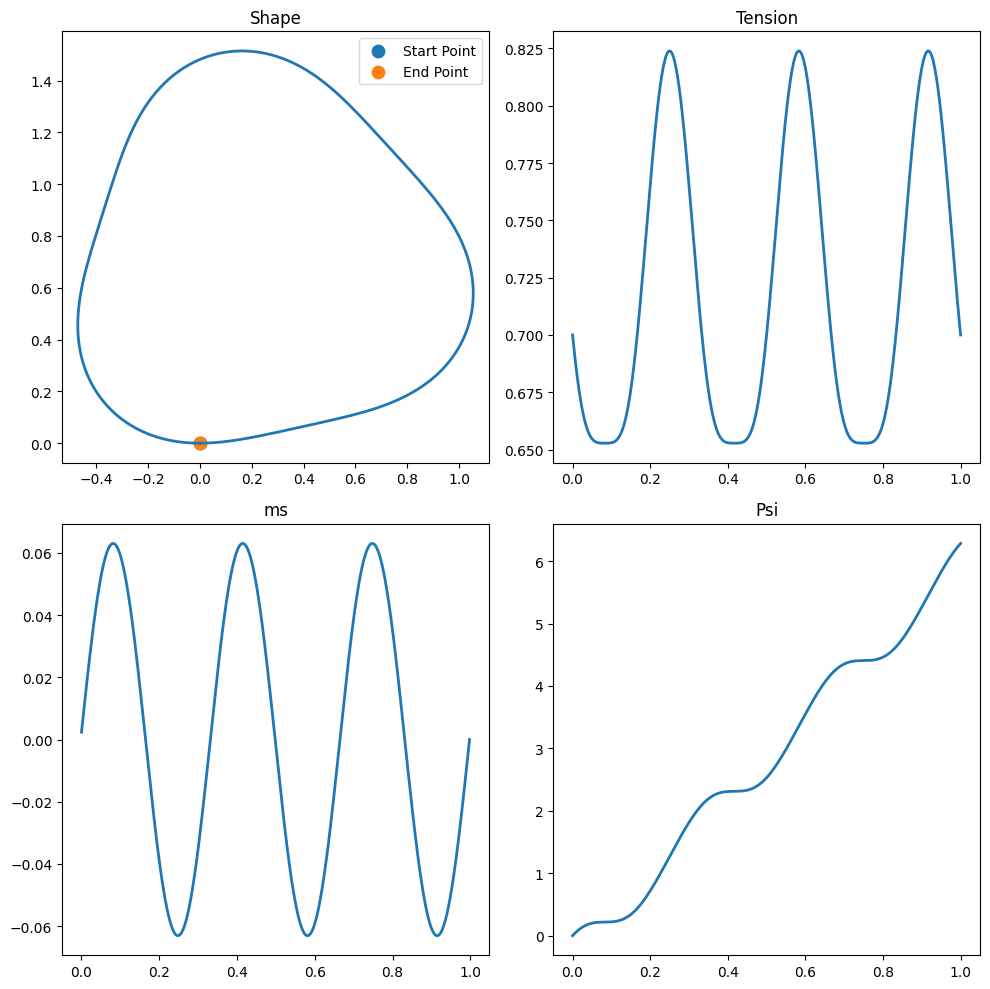

Length: 4.763469981033828
integrals: (np.float64(-1.1102230246251565e-16), np.float64(6.661338147750939e-16), np.float64(-1.1341276379875365e-05))


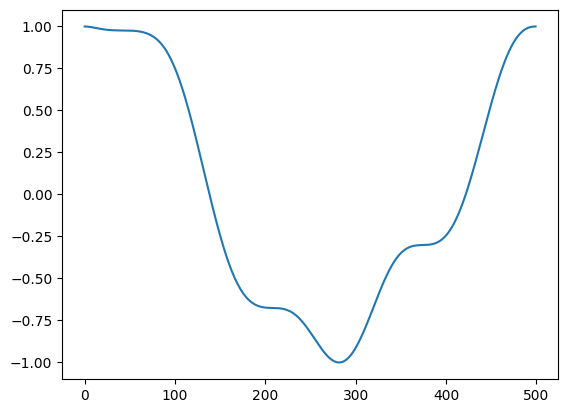

In [3]:
#try alex version and 'debug'?

from helper_functions import *

pn = 3
a, b = 0.5, 0
tns = lambda x: a * ( np.cos(pn*np.pi*x+np.pi)**2 - 0.5 ) + b * ( np.cos(2*np.pi*(x-1.5)+np.pi)**2 - 0.5 )
dtn = lambda x: a * ( -(pn*np.pi)*2*np.cos(pn*np.pi*x+np.pi)*np.sin(pn*np.pi*x+np.pi)) - b * (2*np.pi)*2*np.cos(2*np.pi*(x-1.5)+np.pi)*np.sin(2*np.pi*(x-1.5)+np.pi)
sol = forward_solver(500, tns=tns, dtns=dtn)
print(f'integrals: {get_integral_shape(sol)}')

In [ ]:
N = 500
psis = np.linspace(0, 2*np.pi, N)